In [ ]:
# !pip install grenadine

In [77]:
import pandas as pd
from grenadine.Inference.inference import score_links, rank_GRN
from grenadine.Inference.regression_predictors import GENIE3
import networkx as nx

In [78]:
expression_data = pd.read_csv('GSE132511_VENSENT.ed.filt.norm.union.csv', index_col=0)
transcription_factors = pd.read_csv('AML_TCGA_regulators.csv', header=None)[0].tolist()
GENIE3_params = {"n_estimators": 30, "max_depth": 3}

In [79]:
print(expression_data.head(2))

       prim.1  prim.2  prim.3  prim.4  prim.5  prim.6  prim.7  mono.1  mono.2  \
ABCC3       2       3       8       9       3       5       0     218      95   
ABCE1    1694    1161    3824    3086    2663    3039    1766    1395    1498   

       mono.3  mono.4  mono.5  
ABCC3     275     233     444  
ABCE1     708     638     933  


In [80]:
transcription_factors

['ZNF506',
 'TCF7',
 'SHOX2',
 'RELB',
 'ZNF211',
 'ING3',
 'NR2F6',
 'BCL3',
 'IRF5',
 'MXD3',
 'ZNF585B',
 'ZNF44',
 'ZNF331',
 'BDP1',
 'KLF3',
 'ZNF684',
 'FIZ1',
 'ERG',
 'GATA2',
 'MYB',
 'NFIC',
 'TCF3',
 'ZNF77',
 'GTF3A',
 'HINFP',
 'IKZF4',
 'PPARA',
 'NFATC3',
 'TBL1XR1',
 'ZNF579',
 'REST',
 'KLF5',
 'PPARD',
 'FLI1',
 'PRDM15',
 'HMGB1',
 'FOXO3',
 'DLX2',
 'TFDP1',
 'POLR3A',
 'ATF3',
 'CEBPE',
 'ERF',
 'SIN3A',
 'NR1D1',
 'TBX19',
 'ZSCAN2',
 'ZNF821',
 'ZBTB14',
 'FOXN2',
 'ZNF74',
 'ZNF354C',
 'ZNF792',
 'ZNF76',
 'E2F2',
 'SREBF2',
 'JUND',
 'ZNF787',
 'ZMAT2',
 'ZNF780B',
 'NFYA',
 'BCL6',
 'DDIT3',
 'KLF2',
 'ARNTL',
 'ZNF528',
 'RXRB',
 'SP4',
 'ZNF555',
 'ZNF181',
 'KLF1',
 'KLF7',
 'HOXB4',
 'ZNF41',
 'ZNF335',
 'CTCF',
 'MAFB',
 'NFIX',
 'NR3C1',
 'ZNF264',
 'AHCTF1',
 'MAZ',
 'TBPL1',
 'FOXC1',
 'HOXA7',
 'GTF3C2',
 'SP2',
 'ZNF32',
 'FOXK1',
 'ZNF544',
 'HOXA2',
 'TFAP2E',
 'MECOM',
 'EGR4',
 'HSF5',
 'IRF7',
 'PLAGL2',
 'ZNF699',
 'RARG',
 'ZNF415',
 'ZNF384'

In [81]:
scores = score_links(
    expression_data,
    score_predictor=GENIE3,
    tf_list=transcription_factors,
    **GENIE3_params
)

In [82]:
scores.head(2)

,ARNT,ARNTL,CEBPD,CEBPG,E2F4,E2F6,EGR3,ELK3,ERG,ESRRA,...,ZNF665,ZNF678,ZNF681,ZNF699,ZNF726,ZNF74,ZNF792,ZNF821,ZSCAN2,ZSCAN31
ABCC3,0.000000,0.000266,0.033671,0.004721,0.059158,0.000005,0.000003,0.003845,0.001108,0.000000,...,0.000279,0.030076,0.003231,0.000000,0.000991,0.000903,0.001235,0.000000,0.009091,0.001117
ABCE1,0.002991,0.000718,0.030136,0.004087,0.055991,0.000000,0.036850,0.001164,0.000000,0.001423,...,0.000636,0.005418,0.031742,0.033015,0.000000,0.000000,0.000000,0.000408,0.013450,0.000471


In [83]:
ranked_list = rank_GRN(scores)

In [84]:
ranked_list.head(2)

,rank,score,TF,TG
ARNTL_ABHD6,1.0,0.498935,ARNTL,ABHD6
ZNF331_CDKN2AIP,2.0,0.448458,ZNF331,CDKN2AIP


In [85]:
filtered_rank_list = ranked_list.head(100000)
filtered_rank_list.head(5)

,rank,score,TF,TG
ARNTL_ABHD6,1.0,0.498935,ARNTL,ABHD6
ZNF331_CDKN2AIP,2.0,0.448458,ZNF331,CDKN2AIP
ZNF821_ZNF436,3.0,0.423403,ZNF821,ZNF436
EGR3_ARMCX1,4.0,0.404870,EGR3,ARMCX1
ZNF331_ZNF675,5.0,0.394891,ZNF331,ZNF675


In [86]:
graph1 = nx.from_pandas_edgelist(filtered_rank_list, source='TF', target='TG',create_using=nx.DiGraph())

In [87]:
graph1.nodes()

NodeView(('ARNTL', 'ABHD6', 'ZNF331', 'CDKN2AIP', 'ZNF821', 'ZNF436', 'EGR3', 'ARMCX1', 'ZNF675', 'CEBPG', 'MREG', 'NFATC2', 'ZC3HAV1L', 'POLR3G', 'MFGE8', 'ZNF143', 'RNF111', 'TGIF1', 'FOXO1', 'BEX4', 'SSBP2', 'E2F6', 'PCYT1A', 'MYB', 'POLR3B', 'DECR1', 'SLC39A10', 'JDP2', 'ZNF699', 'SEPW1', 'TCEANC', 'ZBTB8A', 'ZSCAN2', 'TNNI2', 'ZNF273', 'ZNF506', 'TCP1', 'C11orf45', 'GEMIN7', 'POLI', 'ABHD15', 'CCP110', 'FBXW5', 'AHCYL1', 'SPG20', 'CD300A', 'RBM12', 'PCF11', 'SOX4', 'CXorf23', 'RFX5', 'MCMBP', 'ZKSCAN7', 'CD53', 'RAC2', 'NR2C2', 'NKD1', 'IP6K2', 'TRIM24', 'WDR27', 'MRPS25', 'ATP1B1', 'TLN1', 'IRF4', 'FAM229B', 'MCU', 'PIAS1', 'CCNYL1', 'DGCR2', 'SMN1', 'NFKB2', 'NCF1', 'OPRL1', 'ZNF175', 'PEPD', 'RIMKLB', 'PDIA3', 'LRRC8D', 'ZNF445', 'C7orf43', 'FLI1', 'SRGAP2C', 'FAM120B', 'RPS4Y1', 'PLAGL1', 'GPALPP1', 'RPL32P3', 'ZNF792', 'SHF', 'VPS33A', 'SLC22A15', 'NOC3L', 'TADA1', 'CAST', 'DDA1', 'NTNG2', 'TCAF1', 'RBBP7', 'PRSS57', 'ZNF678', 'TNFAIP8L2', 'RXRA', 'NUBPL', 'SPIN4', 'MLX', 'TG

In [88]:
provided_grn = pd.read_csv('AML_TCGA_GRN.csv')
provided_graph = nx.from_pandas_edgelist(provided_grn, 'source', 'target', create_using=nx.DiGraph())

In [89]:
provided_graph.edges()

OutEdgeView([('ARID3A', 'MSI2'), ('ARID3A', 'SIRPB2'), ('ARID3A', 'PKM'), ('ARID3A', 'VPS37C'), ('ARID3A', 'ADAP1'), ('ARID3A', 'ANXA11'), ('ARID3A', 'APLP2'), ('ARID3A', 'CMIP'), ('ARID3A', 'CXorf21'), ('ARID3A', 'DTX2'), ('ARID3A', 'FAM19A2'), ('ARID3A', 'HOMER3'), ('ARID3A', 'RAB35'), ('ARID3A', 'SPI1'), ('ARID3A', 'STX3'), ('ARID3A', 'TEX2'), ('ARID3A', 'TIRAP'), ('SPI1', 'GABPB1'), ('SPI1', 'ACTB'), ('SPI1', 'AKIRIN2'), ('SPI1', 'APOBR'), ('SPI1', 'ARPC4'), ('SPI1', 'CFP'), ('SPI1', 'CSF1R'), ('SPI1', 'FCGR1B'), ('SPI1', 'FES'), ('SPI1', 'G6PD'), ('SPI1', 'GABARAP'), ('SPI1', 'GNAI2'), ('SPI1', 'GPSM3'), ('SPI1', 'MGAT1'), ('SPI1', 'PILRA'), ('SPI1', 'PRKCD'), ('SPI1', 'PYCARD'), ('SPI1', 'RAB5C'), ('SPI1', 'RGS19'), ('SPI1', 'SH2B2'), ('SPI1', 'SLC16A3'), ('SPI1', 'TAF10'), ('SPI1', 'TBC1D8'), ('SPI1', 'TYROBP'), ('SPI1', 'WWP2'), ('SPI1', 'ZNF385A'), ('SPI1', 'B4GALT1-AS1'), ('SPI1', 'DPEP2'), ('SPI1', 'FAM131A'), ('SPI1', 'GBA'), ('SPI1', 'LTBR'), ('SPI1', 'MYADM'), ('SPI1', 'R

In [90]:
def compare_networks(created, provided):
    nodes = set(created.nodes()).intersection(set(provided.nodes()))
    total_possible_edges = len(nodes) * (len(nodes) - 1)

    tp = len(set(created.edges()) & set(provided.edges()))
    fn = len(set(provided.edges()) - set(created.edges()))
    fp = len(set(created.edges()) - set(provided.edges()))
    tn = total_possible_edges - (tp + fn + fp)

    return tp, fn, fp, tn, total_possible_edges

In [91]:
# Compute TP, FN, FP, TN
tp, fn, fp, tn, tpe = compare_networks(provided_graph,graph1)

print(f"TP: {tp}")
print(f"FN: {fn}")
print(f"FP: {fp}")
print(f"TN: {tn}")

TP: 2723
FN: 69797
FP: 21044
TN: 978696


In [92]:
sensitivity = tp / (tp + fn) if tp + fn > 0 else 0
specificity = tn / (tn + fp) if tn + fp > 0 else 0

print(f"Sensitivity: {sensitivity:.3f}")
print(f"Specificity: {specificity:.3f}")

Sensitivity: 0.038
Specificity: 0.979


In [93]:
import matplotlib.pyplot as plt

In [94]:
top_20 = filtered_rank_list.head(20)

In [95]:
top_20.head(2)

,rank,score,TF,TG
ARNTL_ABHD6,1.0,0.498935,ARNTL,ABHD6
ZNF331_CDKN2AIP,2.0,0.448458,ZNF331,CDKN2AIP


In [97]:
top_20_graph = nx.from_pandas_edgelist(top_20, 'TF', 'TG', create_using=nx.DiGraph())

In [98]:
color_map = []
for node in top_20_graph.nodes():
    if node in transcription_factors:
        color_map.append('red')
    else:
        color_map.append('grey')

In [99]:
color_map

['red',
 'grey',
 'red',
 'grey',
 'red',
 'grey',
 'red',
 'grey',
 'grey',
 'red',
 'grey',
 'red',
 'grey',
 'red',
 'grey',
 'red',
 'grey',
 'red',
 'grey',
 'grey',
 'grey',
 'red',
 'grey',
 'red',
 'grey',
 'grey',
 'grey',
 'red',
 'red',
 'grey',
 'grey',
 'grey']

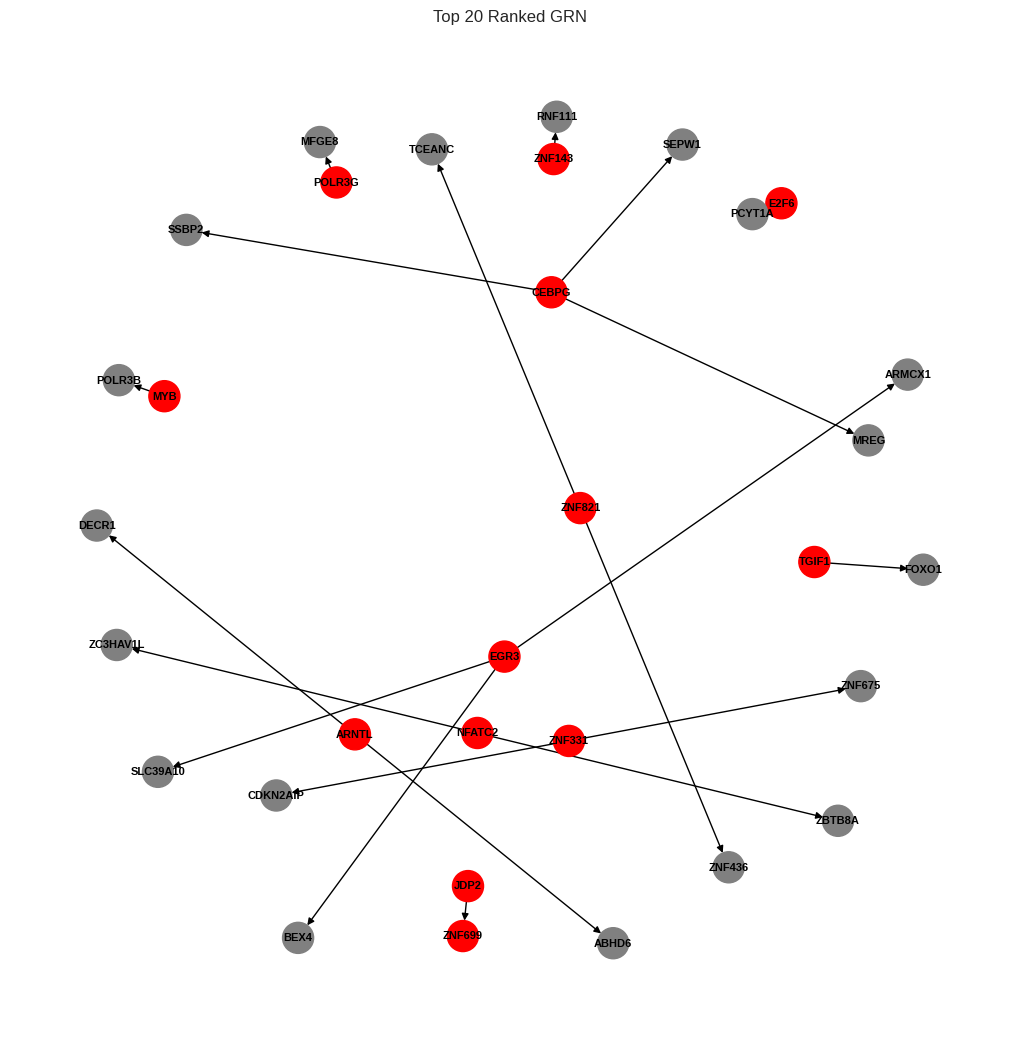

In [109]:
plt.figure(figsize=(10, 10))
nx.draw(top_20_graph, with_labels=True, node_color=color_map, node_size=500, font_size=8, font_color='black', edge_color='black', linewidths=1, font_weight='bold')
plt.title('Top 20 Ranked GRN')
plt.savefig('network_visualization.png')
plt.show()